In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 200  #Number of Distance Steps
print_time = print_time = [0.2,0.5,1] #Times at which we want to print the graph
dt = 1e-5  #time step size
n = np.zeros((int(print_time[-1]/dt) +1 , N))  #number of particles(t,x)
conc = np.zeros((int(print_time[-1]/dt) +1, N))  #conc of solute(t,x)
velocity = np.zeros((int(print_time[-1]/dt) +1, N))  #velocity of particle(t,x)
Co=1
B=0.1
conc[0,:]=Co
n[0,:]=0
n[:,0]=1

x = np.linspace(0, 1, N)
count = 0
dx = 1/(N-1) #step size
k = dt/(dx*dx) #for simplicity
Dp = 1e-12 #diffusivity of particle
Ds = 1e-9  #diffusivity of solute
dp_ds = Dp/Ds
num_steps = int(print_time[-1]/dt)  #Number of Time steps


for t in range(1 , num_steps+1):
    conc[t , 0] = Co*B  #Boundary condition
    for j in range(1,N-1):
        conc[t,j] = conc[t-1,j] + k*(conc[t-1,j+1] - 2 * conc[t-1 , j] + conc[t-1 , j-1])  #from differential equation
    conc[t , N-1] = conc[t,N-2]  #No flux boundary condition

    velocity[t,0] = (conc[t,1] - conc[t,0])/(conc[t,0] * dx)
    for i in range(1 , N-1):
        velocity[t,i] = (conc[t , i+1] - conc[t,i-1])/(conc[t,i] * 2*dx)
    velocity[t,N-1] = (conc[t,N-1] - conc[t,N-2])/(conc[t,N-1] * dx)

#     if count < len(print_time) and np.isclose(t*dt, print_time[count], atol=1e-10): #basically if t is equal to print_time then just plot the curve.
#         plt.plot(x, velocity[t , :], label=f't = {t*dt:.1e}')  #Can get velocity and concentration profile just by replacing new_n by new_conc and velocity respectively
#         count = count + 1

# plt.xlabel('Distance (x)')
# plt.ylabel('n (x)')
# plt.title('N Profiles Over Time')
# plt.grid()
# plt.show()



27.017364211120327
35.42675218011756
49.31628824044486


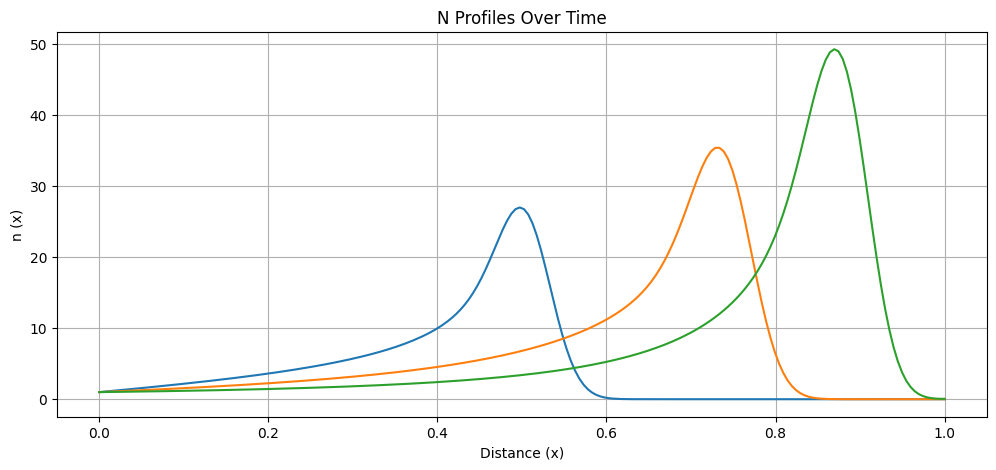

In [3]:
plt.figure(figsize=(12, 5))  # ⬅️ Wider x-axis by increasing figure width
count = 0

for t in range(1 , num_steps+1):
    for j in range(1,N-1):
        n[t,j] = n[t-1,j] + k*(n[t-1,j+1] - 2 * n[t-1 , j] + n[t-1 , j-1])*Dp/Ds - (n[t-1,j]*velocity[t-1,j] - n[t-1,j-1]*velocity[t-1,j-1])*dt/dx
    n[t , N-1] = n[t,N-2]

for t in range(1 , num_steps+1):
    if count < len(print_time) and np.isclose(t*dt, print_time[count], atol=1e-10): #basically if t is equal to print_time then just plot the curve.
        plt.plot(x, n[t , :], label=f't = {t*dt:.1e}')  #Can get velocity and concentration profile just by replacing new_n by new_conc and velocity respectively
        count = count + 1
        print(np.max(n[t , :]))

plt.xlabel('Distance (x)')
plt.ylabel('n (x)')
plt.title('N Profiles Over Time')
plt.grid()
plt.show()

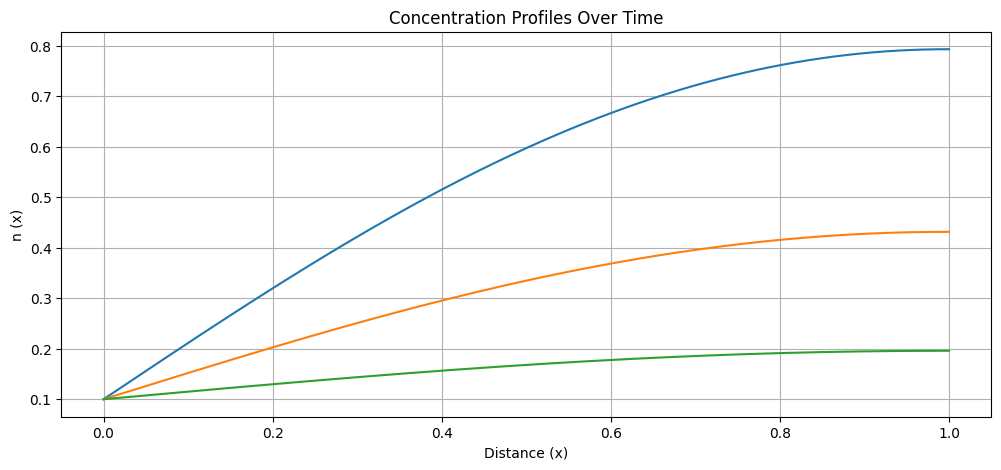

In [4]:
plt.figure(figsize=(12, 5))  # ⬅️ Wider x-axis by increasing figure width
count = 0
for t in range(1 , num_steps+1):
    if count < len(print_time) and np.isclose(t*dt, print_time[count], atol=1e-10): #basically if t is equal to print_time then just plot the curve.
        plt.plot(x, conc[t , :], label=f't = {t*dt:.1e}')  #Can get velocity and concentration profile just by replacing new_n by new_conc and velocity respectively
        count = count + 1

plt.xlabel('Distance (x)')
plt.ylabel('n (x)')
plt.title('Concentration Profiles Over Time')
plt.grid()
plt.show()

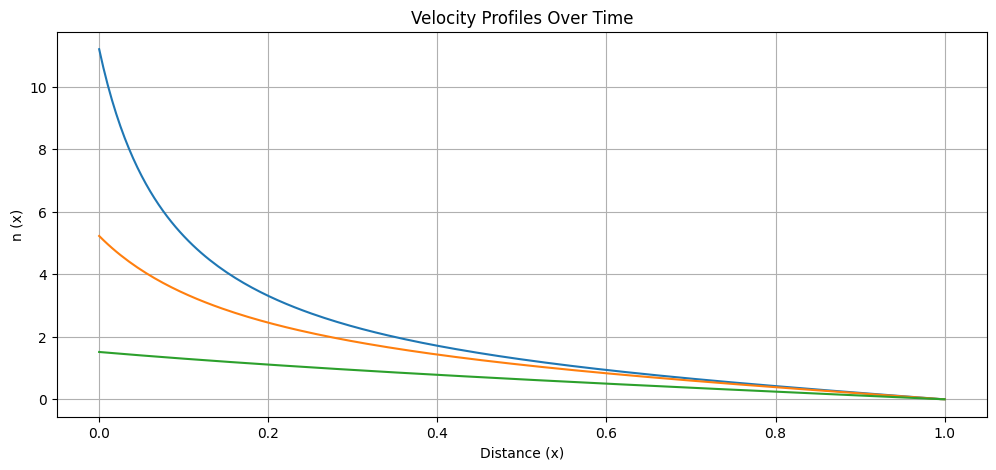

In [5]:
plt.figure(figsize=(12, 5))  # ⬅️ Wider x-axis by increasing figure width
count = 0
for t in range(1 , num_steps+1):
    if count < len(print_time) and np.isclose(t*dt, print_time[count], atol=1e-10): #basically if t is equal to print_time then just plot the curve.
        plt.plot(x, velocity[t , :], label=f't = {t*dt:.1e}')  #Can get velocity and concentration profile just by replacing new_n by new_conc and velocity respectively
        count = count + 1

plt.xlabel('Distance (x)')
plt.ylabel('n (x)')
plt.title('Velocity Profiles Over Time')
plt.grid()
plt.show()